In [ ]:
import pickle

def batch_loader(path):
    with open(path,'rb') as file:
      batch=pickle.load(file,encoding='bytes')
      data=batch[b'data']
      labels=batch[b'labels']
      return data,labels



In [ ]:
d,l=batch_loader('/content/data_batch_1')

print(d,l)

[[ 59  43  50 ... 140  84  72]
 [154 126 105 ... 139 142 144]
 [255 253 253 ...  83  83  84]
 ...
 [ 71  60  74 ...  68  69  68]
 [250 254 211 ... 215 255 254]
 [ 62  61  60 ... 130 130 131]] [6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6, 4, 3, 6, 6, 2, 6, 3, 5, 4, 0, 0, 9, 1, 3, 4, 0, 3, 7, 3, 3, 5, 2, 2, 7, 1, 1, 1, 2, 2, 0, 9, 5, 7, 9, 2, 2, 5, 2, 4, 3, 1, 1, 8, 2, 1, 1, 4, 9, 7, 8, 5, 9, 6, 7, 3, 1, 9, 0, 3, 1, 3, 5, 4, 5, 7, 7, 4, 7, 9, 4, 2, 3, 8, 0, 1, 6, 1, 1, 4, 1, 8, 3, 9, 6, 6, 1, 8, 5, 2, 9, 9, 8, 1, 7, 7, 0, 0, 6, 9, 1, 2, 2, 9, 2, 6, 6, 1, 9, 5, 0, 4, 7, 6, 7, 1, 8, 1, 1, 2, 8, 1, 3, 3, 6, 2, 4, 9, 9, 5, 4, 3, 6, 7, 4, 6, 8, 5, 5, 4, 3, 1, 8, 4, 7, 6, 0, 9, 5, 1, 3, 8, 2, 7, 5, 3, 4, 1, 5, 7, 0, 4, 7, 5, 5, 1, 0, 9, 6, 9, 0, 8, 7, 8, 8, 2, 5, 2, 3, 5, 0, 6, 1, 9, 3, 6, 9, 1, 3, 9, 6, 6, 7, 1, 0, 9, 5, 8, 5, 2, 9, 0, 8, 8, 0, 6, 9, 1, 1, 6, 3, 7, 6, 6, 0, 6, 6, 1, 7, 1, 5, 8, 3, 6, 6, 8, 6, 8, 4, 6, 6, 1, 3, 8, 3, 4, 1, 7, 1, 3, 8, 5, 1, 1, 4, 0, 9, 3, 7, 4, 

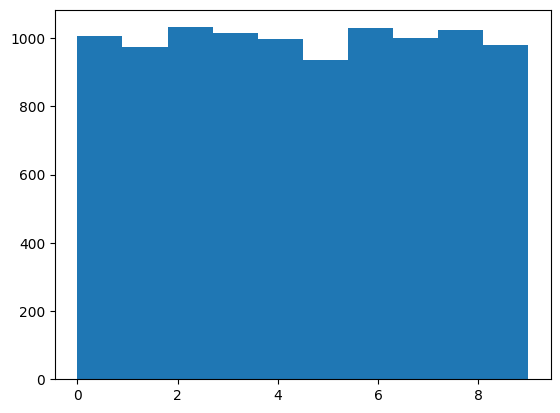

In [ ]:
import matplotlib.pyplot as plt
plt.hist(l)
plt.show()

In [ ]:
plt.hist(d)
plt.show()

In [ ]:
import os
import numpy as np
x_train=[]
y_train=[]
data_dir = '/content'
for i in range(1,6):
  data,labels=batch_loader(os.path.join(data_dir,f'data_batch_{i}'))
  x_train.append(data)
  y_train.append(labels)
x_train=np.vstack(x_train)
y_train=np.hstack(y_train)



In [ ]:
x_train

In [ ]:
y_train

In [ ]:
plt.hist(x_train)
plt.show()

In [ ]:
x_test, y_test = batch_loader(os.path.join(data_dir, "test_batch"))


In [ ]:
x_test

In [ ]:
#y_test
x_real=x_test
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50, random_state=42)  # Reduce to 100 dimensions
x_train_pca = pca.fit_transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)

In [ ]:
from sklearn.mixture import GaussianMixture
gmm=GaussianMixture(n_components=10,random_state=42,covariance_type='full')
gmm.fit(x_train_pca)

In [ ]:
# Access the covariance matrices of the GMM
covariances = gmm.covariances_

# Print the covariance matrices for each component
for i, cov in enumerate(covariances):
    print(f"Covariance matrix for component {i}:\n", cov)

# If you want to visualize the variance for each component:
import matplotlib.pyplot as plt

# For simplicity, let's plot the diagonal of each covariance matrix (representing variance)
variances = [np.diagonal(cov) for cov in covariances]

# Plot variance for each component
plt.figure(figsize=(10, 6))
plt.bar(range(len(variances)), [np.sum(v) for v in variances])  # Sum of variances across dimensions
plt.xlabel("Gaussian Components")
plt.ylabel("Total Variance")
plt.title("Variance for Each Gaussian Component in GMM")
plt.show()


In [ ]:
train_clusters = gmm.predict(x_train_pca)
test_clusters = gmm.predict(x_test_pca)

In [ ]:
from scipy.stats import mode
from sklearn.metrics import accuracy_score
train_labels = np.zeros_like(train_clusters)
for i in range(10):
    mask = (train_clusters == i)
    train_labels[mask] = mode(y_train[mask])[0]

# Predict test labels using the mapping
test_labels = np.zeros_like(test_clusters)
for i in range(10):
    mask = (test_clusters == i)
    test_labels[mask] = mode(y_train[train_clusters == i])[0]

# Evaluate the classification
accuracy = accuracy_score(y_test, test_labels)
print(f"Accuracy: {accuracy * 100:.2f}%")

In [ ]:
import cv2


index = np.random.randint(0, len(x_test))  # Random index in test set
image = x_real[index]  # Get the image at the chosen index
true_label = y_test[index]  # True label of the image

# Display the image (optional)
plt.imshow(image.reshape(32, 32, 3))  # Reshape to (32, 32, 3) for visualization
plt.title(f"True Label: {true_label}")
plt.show()

In [ ]:
# Step 1: Normalize and flatten the image
image_scaled = image / 255.0  # Normalize to [0, 1]
image_flattened = image_scaled.flatten().reshape(1, -1)  # Flatten the image

# Step 2: Fit PCA using the training data (important step)
pca = PCA(n_components=50, random_state=42)

# Assuming x_train_scaled is the scaled training data (flattened)
x_train_scaled = x_train / 255.0  # Normalize the training data
x_train_flattened = x_train_scaled.reshape(x_train_scaled.shape[0], -1)  # Flatten all training images

# Fit PCA on the training data
pca.fit(x_train_flattened)

# Step 3: Apply the fitted PCA model to the test image
image_pca = pca.transform(image_flattened)  # Use 'transform' on the test image

# Step 4: Use the trained GMM model to classify the image
predicted_label = gmm.predict(image_pca)  # Predict the label using GMM

print(f"Predicted Label: {predicted_label[0]}, True Label: {true_label}")
